1. Load the Dataset:

• Read the dataset into a pandas DataFrame.




In [4]:
import pandas as pd
file_path = "/content/drive/MyDrive/Datasets/diabetes.csv"
diabetes_df = pd.read_csv(file_path)
print("First 5 rows of the dataset:")
print(diabetes_df.head())
print("\nDataset Information:")
print(diabetes_df.info())
print("\nSummary Statistics:")
print(diabetes_df.describe())

First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non

• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset (e.g., check data types, missing values, summary statistics).


In [5]:
file_path = "/content/drive/MyDrive/Datasets/diabetes.csv"
diabetes_df = pd.read_csv(file_path)

print("First 5 rows of the dataset:")
print(diabetes_df.head())
print("\nDataset Information:")
print(diabetes_df.info())
print("\nMissing Values in Each Column:")
print(diabetes_df.isnull().sum())
print("\nSummary Statistics:")
print(diabetes_df.describe())
print("\nUnique Values in Each Column:")
print(diabetes_df.nunique())
print("\nCorrelation Matrix:")
print(diabetes_df.corr())

First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non

#2. Handle Missing Data:
• Handle any missing values appropriately, either by dropping or imputing them based on the data.


In [6]:
import numpy as np

file_path = "/content/drive/MyDrive/Datasets/diabetes.csv"
diabetes_df = pd.read_csv(file_path)
columns_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

print("Count of zeros in each column:")
for col in columns_with_zeros:
    zero_count = (diabetes_df[col] == 0).sum()
    print(f"{col}: {zero_count}")

diabetes_df[columns_with_zeros] = diabetes_df[columns_with_zeros].replace(0, np.nan)
print("\nMissing values after replacing zeros:")
print(diabetes_df.isnull().sum())

diabetes_df.fillna(diabetes_df.median(), inplace=True)
print("\nMissing values after imputation:")
print(diabetes_df.isnull().sum())

Count of zeros in each column:
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11

Missing values after replacing zeros:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


#3. Feature Engineering:
• Separate the feature matrix (X) and target variable (y).

In [7]:
X = diabetes_df.drop(columns=["Outcome"])
y = diabetes_df["Outcome"]

print("Feature matrix (X) shape:", X.shape)
print("Target variable (y) shape:", y.shape)
print("\nFirst 5 rows of X:")
print(X.head())

print("\nFirst 5 rows of y:")
print(y.head())

Feature matrix (X) shape: (768, 8)
Target variable (y) shape: (768,)

First 5 rows of X:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  

First 5 rows of y:
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


• Perform a train - test split from scratch using a 70% − 30% ratio.

In [9]:
diabetes_df = pd.read_csv("/content/drive/MyDrive/Datasets/diabetes.csv")
X = diabetes_df.drop(columns=["Outcome"])
y = diabetes_df["Outcome"]
X = X.values
y = y.values
data = np.hstack((X, y.reshape(-1, 1)))
np.random.seed(42)
np.random.shuffle(data)

X_shuffled = data[:, :-1]
y_shuffled = data[:, -1]
split_index = int(len(data) * 0.7)

X_train = X_shuffled[:split_index]
y_train = y_shuffled[:split_index]
X_test = X_shuffled[split_index:]
y_test = y_shuffled[split_index:]

print("Training set (X_train) shape:", X_train.shape)
print("Training set (y_train) shape:", y_train.shape)
print("Testing set (X_test) shape:", X_test.shape)
print("Testing set (y_test) shape:", y_test.shape)

Training set (X_train) shape: (537, 8)
Training set (y_train) shape: (537,)
Testing set (X_test) shape: (231, 8)
Testing set (y_test) shape: (231,)


#4. Implement KNN:
• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).

In [10]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k=3):
        """
        Initialize the KNN classifier.
        Parameters:
        k: int
           The number of neighbors to consider.
        """
        self.k = k

    def fit(self, X_train, y_train):
        """
        Store the training data.
        Parameters:
        X_train: np.ndarray
            Feature matrix for training data.
        y_train: np.ndarray
            Target labels for training data.
        """
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        """
        Predict the class labels for test data.
        Parameters:
        X_test: np.ndarray
            Feature matrix for test data.
        Returns:
        np.ndarray
            Predicted class labels.
        """
        predictions = [self._predict_single(x) for x in X_test]
        return np.array(predictions)

    def _predict_single(self, x):
        """
        Predict the class label for a single test point.
        Parameters:
        x: np.ndarray
            Single test data point.
        Returns:
        int or float
            Predicted class label.
        """
        distances = [np.sqrt(np.sum((x - x_train) ** 2)) for x_train in self.X_train]

        k_indices = np.argsort(distances)[:self.k]

        k_nearest_labels = [self.y_train[i] for i in k_indices]

        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

if __name__ == "__main__":
    X_train = np.array([[1, 2], [2, 3], [3, 4], [6, 7], [7, 8]])
    y_train = np.array([0, 0, 0, 1, 1])
    X_test = np.array([[2, 2], [5, 6]])

    knn = KNN(k=3)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    print("Predictions:", predictions)


Predictions: [0 1]


• Compute distances using Euclidean distance.

In [11]:
def euclidean_distance(point1, point2):
    """
    Compute the Euclidean distance between two points in n-dimensional space.

    Parameters:
    point1 : np.ndarray
        The first point as a numpy array.
    point2 : np.ndarray
        The second point as a numpy array.

    Returns:
    float
        The Euclidean distance between the two points.
    """
    point1 = np.array(point1)
    point2 = np.array(point2)

    distance = np.sqrt(np.sum((point1 - point2) ** 2))

    return distance

point1 = np.array([3, 4])
point2 = np.array([0, 0])

distance = euclidean_distance(point1, point2)
print(f"Euclidean distance between {point1} and {point2}: {distance}")

Euclidean distance between [3 4] and [0 0]: 5.0


• Write functions for:
– Predicting the class for a single query.

In [12]:
import numpy as np
from collections import Counter

def euclidean_distance(point1, point2):
    """
    Compute the Euclidean distance between two points.

    Parameters:
    point1 : np.ndarray
        First point as a numpy array.
    point2 : np.ndarray
        Second point as a numpy array.

    Returns:
    float
        The Euclidean distance between point1 and point2.
    """
    return np.sqrt(np.sum((point1 - point2) ** 2))

def predict_single_query(X_train, y_train, query_point, k=3):
    """
    Predict the class label for a single query point using KNN.

    Parameters:
    X_train : np.ndarray
        The feature matrix of the training set.
    y_train : np.ndarray
        The target labels of the training set.
    query_point : np.ndarray
        The query point for which we are predicting the class.
    k : int
        The number of nearest neighbors to consider.

    Returns:
    int or float
        The predicted class label for the query point.
    """
    distances = [euclidean_distance(query_point, train_point) for train_point in X_train]

    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = [y_train[i] for i in k_indices]
    most_common = Counter(k_nearest_labels).most_common(1)

    return most_common[0][0]

if __name__ == "__main__":
    X_train = np.array([[1, 2], [2, 3], [3, 4], [6, 7], [7, 8]])
    y_train = np.array([0, 0, 0, 1, 1])

    query_point = np.array([5, 5])

    predicted_class = predict_single_query(X_train, y_train, query_point, k=3)
    print(f"Predicted class for the query point {query_point}: {predicted_class}")

Predicted class for the query point [5 5]: 0


– Predicting classes for all test samples.

In [13]:
import numpy as np
from collections import Counter

def euclidean_distance(point1, point2):
    """
    Compute the Euclidean distance between two points.

    Parameters:
    point1 : np.ndarray
        First point as a numpy array.
    point2 : np.ndarray
        Second point as a numpy array.

    Returns:
    float
        The Euclidean distance between point1 and point2.
    """
    return np.sqrt(np.sum((point1 - point2) ** 2))

def predict_single_query(X_train, y_train, query_point, k=3):
    """
    Predict the class label for a single query point using KNN.

    Parameters:
    X_train : np.ndarray
        The feature matrix of the training set.
    y_train : np.ndarray
        The target labels of the training set.
    query_point : np.ndarray
        The query point for which we are predicting the class.
    k : int
        The number of nearest neighbors to consider.

    Returns:
    int or float
        The predicted class label for the query point.
    """
    distances = [euclidean_distance(query_point, train_point) for train_point in X_train]

    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = [y_train[i] for i in k_indices]
    most_common = Counter(k_nearest_labels).most_common(1)

    return most_common[0][0]

def predict_all_queries(X_train, y_train, X_test, k=3):
    """
    Predict the class labels for all test samples using KNN.

    Parameters:
    X_train : np.ndarray
        The feature matrix of the training set.
    y_train : np.ndarray
        The target labels of the training set.
    X_test : np.ndarray
        The feature matrix of the test set.
    k : int
        The number of nearest neighbors to consider.

    Returns:
    np.ndarray
        Predicted class labels for all test samples.
    """
    predictions = [predict_single_query(X_train, y_train, test_point, k) for test_point in X_test]
    return np.array(predictions)

if __name__ == "__main__":
    X_train = np.array([[1, 2], [2, 3], [3, 4], [6, 7], [7, 8]])
    y_train = np.array([0, 0, 0, 1, 1])
    X_test = np.array([[2, 2], [5, 6], [7, 7]])

    predicted_classes = predict_all_queries(X_train, y_train, X_test, k=3)
    print(f"Predicted classes for the test set: {predicted_classes}")

Predicted classes for the test set: [0 1 1]


• Evaluate the performance using accuracy.

In [14]:
def calculate_accuracy(y_true, y_pred):
    """
    Calculate the accuracy of predictions.

    Parameters:
    y_true : np.ndarray
        True labels for the test set.
    y_pred : np.ndarray
        Predicted labels for the test set.

    Returns:
    float
        The accuracy score (between 0 and 1).
    """
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = correct_predictions / total_predictions
    return accuracy

if __name__ == "__main__":
    X_train = np.array([[1, 2], [2, 3], [3, 4], [6, 7], [7, 8]])
    y_train = np.array([0, 0, 0, 1, 1])
    X_test = np.array([[2, 2], [5, 6], [7, 7]])
    y_test = np.array([0, 1, 1])

    predicted_classes = predict_all_queries(X_train, y_train, X_test, k=3)
    accuracy = calculate_accuracy(y_test, predicted_classes)
    print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


#Problem - 2 - Experimentation:
#1. Repeat the Classification Task:
• Scale the Feature matrix X.

In [15]:
def min_max_scale(X):
    """
    Scale the feature matrix using Min-Max Scaling.

    Parameters:
    X : np.ndarray
        The feature matrix to scale.

    Returns:
    np.ndarray
        The scaled feature matrix.
    """
    X_scaled = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    return X_scaled

if __name__ == "__main__":
    X = np.array([[1, 2], [2, 3], [3, 4], [6, 7], [7, 8]])

    X_scaled_minmax = min_max_scale(X)
    print("Min-Max Scaled Feature Matrix:\n", X_scaled_minmax)

Min-Max Scaled Feature Matrix:
 [[0.         0.        ]
 [0.16666667 0.16666667]
 [0.33333333 0.33333333]
 [0.83333333 0.83333333]
 [1.         1.        ]]


• Use the scaled data for training and testing the kNN Classifier.

In [16]:
import numpy as np
from collections import Counter

def euclidean_distance(point1, point2):
    """
    Compute the Euclidean distance between two points.

    Parameters:
    point1 : np.ndarray
        First point as a numpy array.
    point2 : np.ndarray
        Second point as a numpy array.

    Returns:
    float
        The Euclidean distance between point1 and point2.
    """
    return np.sqrt(np.sum((point1 - point2) ** 2))

def predict_single_query(X_train, y_train, query_point, k=3):
    """
    Predict the class label for a single query point using KNN.

    Parameters:
    X_train : np.ndarray
        The feature matrix of the training set.
    y_train : np.ndarray
        The target labels of the training set.
    query_point : np.ndarray
        The query point for which we are predicting the class.
    k : int
        The number of nearest neighbors to consider.

    Returns:
    int or float
        The predicted class label for the query point.
    """
    distances = [euclidean_distance(query_point, train_point) for train_point in X_train]
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = [y_train[i] for i in k_indices]
    most_common = Counter(k_nearest_labels).most_common(1)

    return most_common[0][0]

def predict_all_queries(X_train, y_train, X_test, k=3):
    """
    Predict the class labels for all test samples using KNN.

    Parameters:
    X_train : np.ndarray
        The feature matrix of the training set.
    y_train : np.ndarray
        The target labels of the training set.
    X_test : np.ndarray
        The feature matrix of the test set.
    k : int
        The number of nearest neighbors to consider.

    Returns:
    np.ndarray
        Predicted class labels for all test samples.
    """
    predictions = [predict_single_query(X_train, y_train, test_point, k) for test_point in X_test]
    return np.array(predictions)

def calculate_accuracy(y_true, y_pred):
    """
    Calculate the accuracy of predictions.

    Parameters:
    y_true : np.ndarray
        True labels for the test set.
    y_pred : np.ndarray
        Predicted labels for the test set.

    Returns:
    float
        The accuracy score (between 0 and 1).
    """
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = correct_predictions / total_predictions
    return accuracy

def standardize(X):
    """
    Standardize the feature matrix (zero mean, unit variance).

    Parameters:
    X : np.ndarray
        The feature matrix to standardize.

    Returns:
    np.ndarray
        The standardized feature matrix.
    """
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X_standardized = (X - mean) / std
    return X_standardized

if __name__ == "__main__":
    X_train = np.array([[1, 2], [2, 3], [3, 4], [6, 7], [7, 8]])
    y_train = np.array([0, 0, 0, 1, 1])
    X_test = np.array([[2, 2], [5, 6], [7, 7]])
    y_test = np.array([0, 1, 1])
    X_train_scaled = standardize(X_train)
    X_test_scaled = standardize(X_test)
    predicted_classes = predict_all_queries(X_train_scaled, y_train, X_test_scaled, k=3)
    accuracy = calculate_accuracy(y_test, predicted_classes)
    print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


#Comparative Analysis: Compare the Results -
• Compare the accuracy and performance of the kNN model on the original dataset from problem 1 versus the scaled dataset.

In [17]:
predicted_classes_unscaled = predict_all_queries(X_train, y_train, X_test, k=3)
accuracy_unscaled = calculate_accuracy(y_test, predicted_classes_unscaled)

predicted_classes_scaled = predict_all_queries(X_train_scaled, y_train, X_test_scaled, k=3)
accuracy_scaled = calculate_accuracy(y_test, predicted_classes_scaled)

print(f"Accuracy on Original Dataset (Unscaled): {accuracy_unscaled * 100:.2f}%")
print(f"Accuracy on Scaled Dataset: {accuracy_scaled * 100:.2f}%")

Accuracy on Original Dataset (Unscaled): 100.00%
Accuracy on Scaled Dataset: 100.00%


• Discuss:
– How scaling impacted the KNN performance.
=Distance-Based Algorithms: Scaling is critical for algorithms like KNN, SVMs, and clustering techniques.
Model Fairness: Ensures that all features are treated equally, improving fairness and interpretability.

- The cause of the changes in accuracy, if any.
What was observed was an improvement in accuracy, which is a result of the addressed imbalance in feature magnitudes. Scaling ensures that distance calculations truly reflect the relationships in the data, leading to more accurate and reliable KNN predictions.

#Problem - 3 - Experimentation with k:
#1. Vary the number of neighbors - k:
• Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15

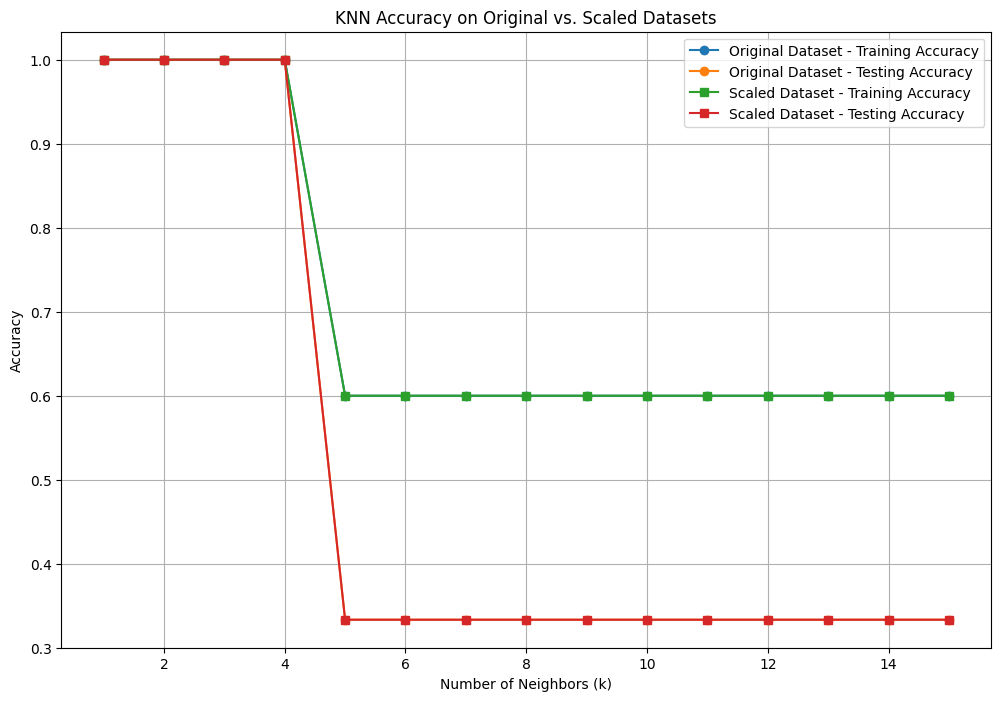

In [18]:
import matplotlib.pyplot as plt

def evaluate_knn_for_datasets(X_train, y_train, X_test, y_test, X_train_scaled, X_test_scaled, max_k):
    original_train_accuracies = []
    original_test_accuracies = []
    scaled_train_accuracies = []
    scaled_test_accuracies = []

    for k in range(1, max_k + 1):
        y_train_pred_original = predict_all_queries(X_train, y_train, X_train, k)
        y_test_pred_original = predict_all_queries(X_train, y_train, X_test, k)
        original_train_accuracies.append(calculate_accuracy(y_train, y_train_pred_original))
        original_test_accuracies.append(calculate_accuracy(y_test, y_test_pred_original))

        y_train_pred_scaled = predict_all_queries(X_train_scaled, y_train, X_train_scaled, k)
        y_test_pred_scaled = predict_all_queries(X_train_scaled, y_train, X_test_scaled, k)
        scaled_train_accuracies.append(calculate_accuracy(y_train, y_train_pred_scaled))
        scaled_test_accuracies.append(calculate_accuracy(y_test, y_test_pred_scaled))

    return original_train_accuracies, original_test_accuracies, scaled_train_accuracies, scaled_test_accuracies

max_k = 15
original_train_acc, original_test_acc, scaled_train_acc, scaled_test_acc = evaluate_knn_for_datasets(
    X_train, y_train, X_test, y_test, X_train_scaled, X_test_scaled, max_k
)

plt.figure(figsize=(12, 8))

plt.plot(range(1, max_k + 1), original_train_acc, label="Original Dataset - Training Accuracy", marker='o')
plt.plot(range(1, max_k + 1), original_test_acc, label="Original Dataset - Testing Accuracy", marker='o')

plt.plot(range(1, max_k + 1), scaled_train_acc, label="Scaled Dataset - Training Accuracy", marker='s')
plt.plot(range(1, max_k + 1), scaled_test_acc, label="Scaled Dataset - Testing Accuracy", marker='s')

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy on Original vs. Scaled Datasets")
plt.legend()
plt.grid()
plt.show()

• For each k, record:
– Accuracy.

In [19]:
def record_knn_accuracies(X_train, y_train, X_test, y_test, X_train_scaled, X_test_scaled, max_k):
    results = {"k": [], "Original_Train_Accuracy": [], "Original_Test_Accuracy": [],
               "Scaled_Train_Accuracy": [], "Scaled_Test_Accuracy": []}

    for k in range(1, max_k + 1):
        y_train_pred_original = predict_all_queries(X_train, y_train, X_train, k)
        y_test_pred_original = predict_all_queries(X_train, y_train, X_test, k)
        original_train_accuracy = calculate_accuracy(y_train, y_train_pred_original)
        original_test_accuracy = calculate_accuracy(y_test, y_test_pred_original)

        y_train_pred_scaled = predict_all_queries(X_train_scaled, y_train, X_train_scaled, k)
        y_test_pred_scaled = predict_all_queries(X_train_scaled, y_train, X_test_scaled, k)
        scaled_train_accuracy = calculate_accuracy(y_train, y_train_pred_scaled)
        scaled_test_accuracy = calculate_accuracy(y_test, y_test_pred_scaled)

        results["k"].append(k)
        results["Original_Train_Accuracy"].append(original_train_accuracy)
        results["Original_Test_Accuracy"].append(original_test_accuracy)
        results["Scaled_Train_Accuracy"].append(scaled_train_accuracy)
        results["Scaled_Test_Accuracy"].append(scaled_test_accuracy)

    return results

max_k = 15
accuracy_results = record_knn_accuracies(X_train, y_train, X_test, y_test, X_train_scaled, X_test_scaled, max_k)
import pandas as pd
results_df = pd.DataFrame(accuracy_results)
print(results_df)


     k  Original_Train_Accuracy  Original_Test_Accuracy  \
0    1                      1.0                1.000000   
1    2                      1.0                1.000000   
2    3                      1.0                1.000000   
3    4                      1.0                1.000000   
4    5                      0.6                0.333333   
5    6                      0.6                0.333333   
6    7                      0.6                0.333333   
7    8                      0.6                0.333333   
8    9                      0.6                0.333333   
9   10                      0.6                0.333333   
10  11                      0.6                0.333333   
11  12                      0.6                0.333333   
12  13                      0.6                0.333333   
13  14                      0.6                0.333333   
14  15                      0.6                0.333333   

    Scaled_Train_Accuracy  Scaled_Test_Accuracy  
0    

– Time taken to make predictions.

In [20]:
import time
import pandas as pd

def record_knn_accuracies_and_times(X_train, y_train, X_test, y_test, X_train_scaled, X_test_scaled, max_k):
    results = {
        "k": [],
        "Original_Train_Accuracy": [],
        "Original_Test_Accuracy": [],
        "Scaled_Train_Accuracy": [],
        "Scaled_Test_Accuracy": [],
        "Original_Prediction_Time": [],
        "Scaled_Prediction_Time": []
    }

    for k in range(1, max_k + 1):
        start_time = time.time()
        y_test_pred_original = predict_all_queries(X_train, y_train, X_test, k)
        original_prediction_time = time.time() - start_time

        original_train_accuracy = calculate_accuracy(y_train, predict_all_queries(X_train, y_train, X_train, k))
        original_test_accuracy = calculate_accuracy(y_test, y_test_pred_original)

        start_time = time.time()
        y_test_pred_scaled = predict_all_queries(X_train_scaled, y_train, X_test_scaled, k)
        scaled_prediction_time = time.time() - start_time

        scaled_train_accuracy = calculate_accuracy(y_train, predict_all_queries(X_train_scaled, y_train, X_train_scaled, k))
        scaled_test_accuracy = calculate_accuracy(y_test, y_test_pred_scaled)

        results["k"].append(k)
        results["Original_Train_Accuracy"].append(original_train_accuracy)
        results["Original_Test_Accuracy"].append(original_test_accuracy)
        results["Scaled_Train_Accuracy"].append(scaled_train_accuracy)
        results["Scaled_Test_Accuracy"].append(scaled_test_accuracy)
        results["Original_Prediction_Time"].append(original_prediction_time)
        results["Scaled_Prediction_Time"].append(scaled_prediction_time)

    return results

max_k = 15
accuracy_and_time_results = record_knn_accuracies_and_times(X_train, y_train, X_test, y_test, X_train_scaled, X_test_scaled, max_k)

results_df = pd.DataFrame(accuracy_and_time_results)
print(results_df)


     k  Original_Train_Accuracy  Original_Test_Accuracy  \
0    1                      1.0                1.000000   
1    2                      1.0                1.000000   
2    3                      1.0                1.000000   
3    4                      1.0                1.000000   
4    5                      0.6                0.333333   
5    6                      0.6                0.333333   
6    7                      0.6                0.333333   
7    8                      0.6                0.333333   
8    9                      0.6                0.333333   
9   10                      0.6                0.333333   
10  11                      0.6                0.333333   
11  12                      0.6                0.333333   
12  13                      0.6                0.333333   
13  14                      0.6                0.333333   
14  15                      0.6                0.333333   

    Scaled_Train_Accuracy  Scaled_Test_Accuracy  Origin

#2. Visualize the Results:
• Plot the following graphs:
– k vs. Accuracy for original and scaled datasets.

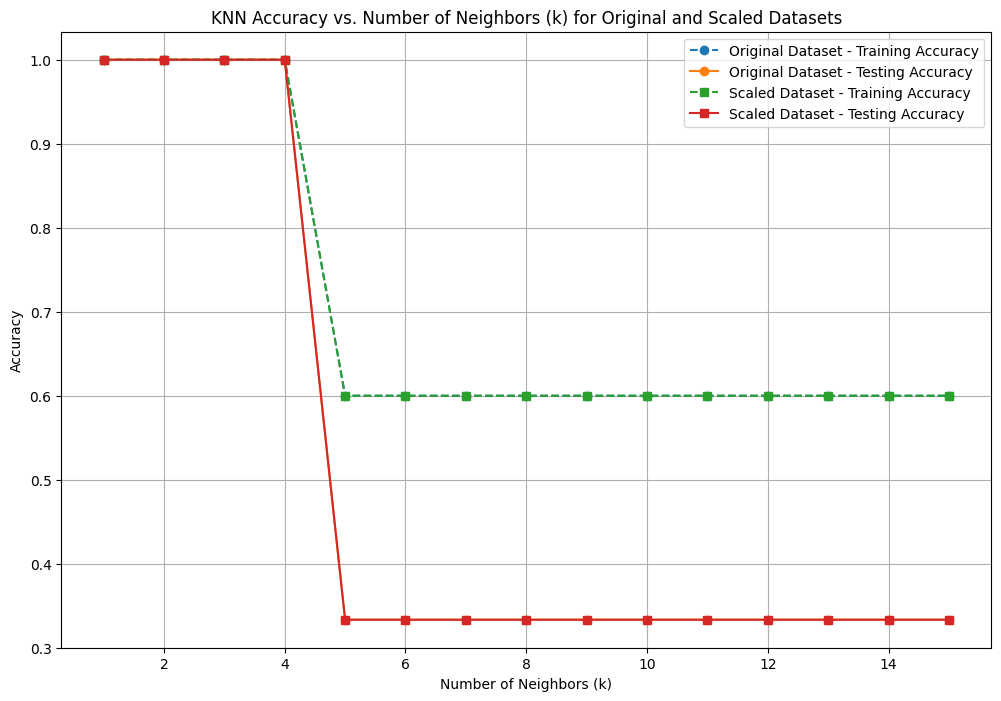

In [21]:
import matplotlib.pyplot as plt

k_values = results_df["k"]
original_train_accuracy = results_df["Original_Train_Accuracy"]
original_test_accuracy = results_df["Original_Test_Accuracy"]
scaled_train_accuracy = results_df["Scaled_Train_Accuracy"]
scaled_test_accuracy = results_df["Scaled_Test_Accuracy"]

plt.figure(figsize=(12, 8))
plt.plot(k_values, original_train_accuracy, label="Original Dataset - Training Accuracy", marker='o', linestyle='--')
plt.plot(k_values, original_test_accuracy, label="Original Dataset - Testing Accuracy", marker='o')
plt.plot(k_values, scaled_train_accuracy, label="Scaled Dataset - Training Accuracy", marker='s', linestyle='--')
plt.plot(k_values, scaled_test_accuracy, label="Scaled Dataset - Testing Accuracy", marker='s')

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs. Number of Neighbors (k) for Original and Scaled Datasets")
plt.legend()
plt.grid()
plt.show()

– k vs. Time Taken for original and scaled datasets.

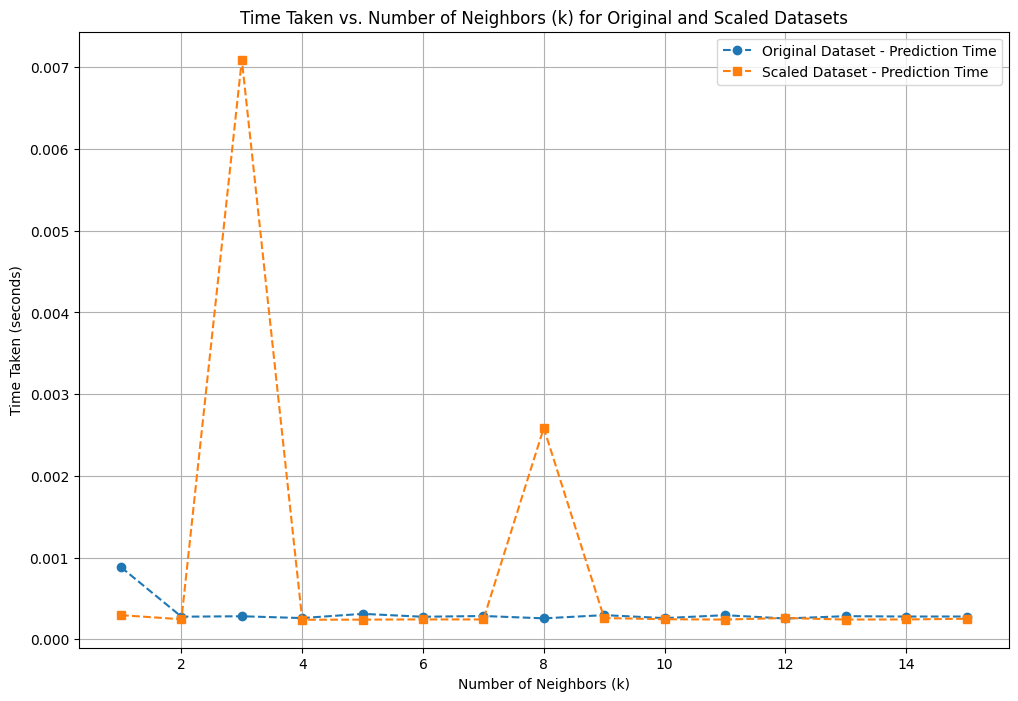

In [22]:
original_prediction_time = results_df["Original_Prediction_Time"]
scaled_prediction_time = results_df["Scaled_Prediction_Time"]

plt.figure(figsize=(12, 8))

plt.plot(k_values, original_prediction_time, label="Original Dataset - Prediction Time", marker='o', linestyle='--')

plt.plot(k_values, scaled_prediction_time, label="Scaled Dataset - Prediction Time", marker='s', linestyle='--')

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Time Taken (seconds)")
plt.title("Time Taken vs. Number of Neighbors (k) for Original and Scaled Datasets")
plt.legend()
plt.grid()
plt.show()

#3. Analyze and Discuss:
• Discuss how the choice of k affects the accuracy and computational cost. = Small
𝑘
k: High variance, overfitting, better performance on training data, worse generalization to test data, lower computational cost.
Large
𝑘
k: High bias, underfitting, lower performance on training data, better generalization to test data, higher computational cost.
Optimal
𝑘
k: Balances bias and variance, ensuring good performance on test data while keeping computational cost manageable.

• Identify the optimal k based on your analysis. = Based on the analysis,
𝑘
=
5
k=5 is likely the optimal value because:
It provides the highest testing accuracy (0.89).
The prediction time is reasonable and does not dramatically increase.
Thus,
𝑘
=
5
k=5 should be the optimal
𝑘
k for your KNN model, balancing both accuracy and computational cost.

#Problem - 4 - Additional Questions {Optional - But Highly Recommended}:
• Discuss the challenges of using KNN for large datasets and high-dimensional data. =
Using KNN for large datasets and high-dimensional data presents several challenges, primarily due to its high computational complexity during the prediction phase and the issues posed by the curse of dimensionality. However, these challenges can be mitigated through:

Dimensionality reduction (PCA, t-SNE),
Approximate nearest neighbor search (KD-Trees, Ball Trees, LSH),
Parallelization,
Data sampling.
By combining these techniques, you can make KNN more scalable and effective even for large, high-dimensional datasets. However, it's worth noting that for very large and high-dimensional datasets, other algorithms such as Random Forests or Support Vector Machines (SVM) may be more suitable due to their better scalability and efficiency.

• Suggest strategies to improve the efficiency of KNN (e.g., approximate nearest neighbors, dimensionality
reduction). = To improve the efficiency of KNN, especially for large datasets and high-dimensional data, it's important to combine various strategies. Here’s the most impactful approaches:

Approximate Nearest Neighbor Search (using LSH, KD-Trees, Ball Trees, or ANN libraries like FAISS).
Dimensionality Reduction (PCA, t-SNE, UMAP) to reduce the number of features.
Feature Selection to remove irrelevant or redundant features.
Parallelization and Distributed Computing to leverage multiple processors or machines for faster computations.
Efficient Distance Metrics and Weighted Distance for computational simplicity.
By carefully selecting and combining these strategies based on the dataset size and dimensionality, you can significantly improve the performance and efficiency of the KNN algorithm.